In [214]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from matplotlib.ticker import FuncFormatter


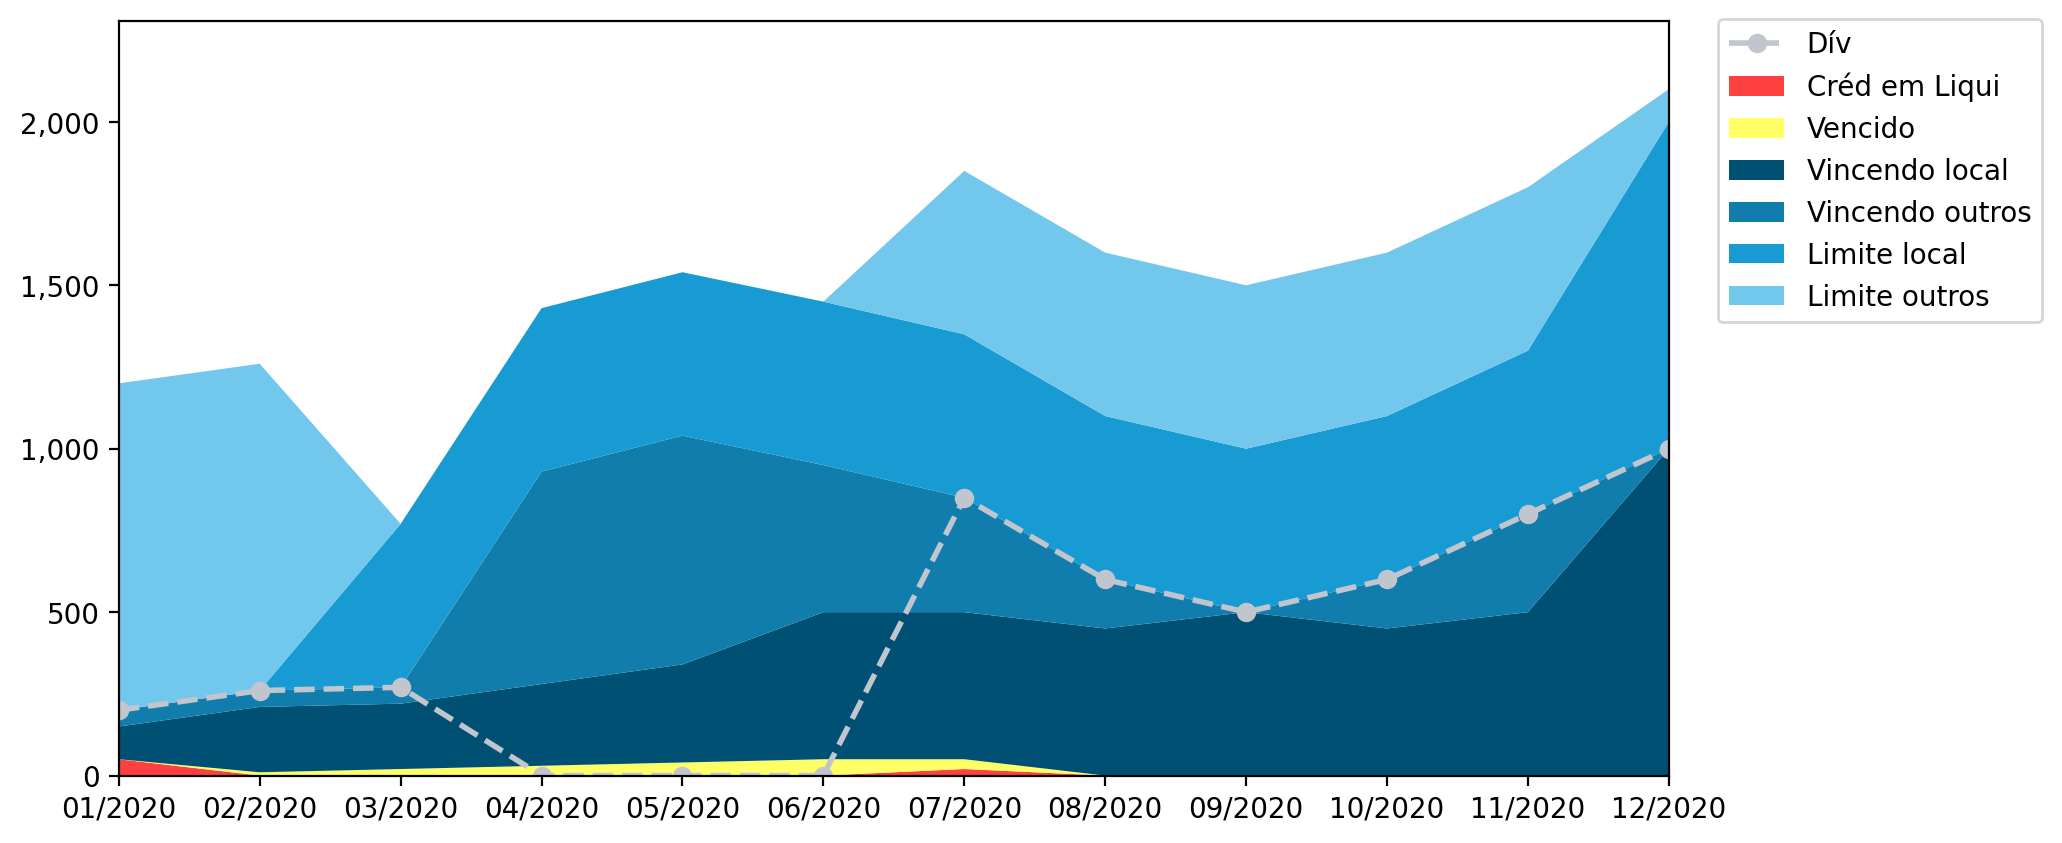

,DATA,LIQUIDAÇAO,VENCIDO,VINCENDO,VINCENDO_TOTAL,LIMITE,LIMITE_TOTAL,VINCENDO_DIF,LIMITE DIF,DIV
0,2020-01-01,50.0,0.0,100,150,0,1000,50,1000,200
1,2020-02-01,0.0,10.0,200,250,0,1000,50,1000,260
2,2020-03-01,0.0,20.0,200,250,500,500,50,0,270
3,2020-04-01,0.0,30.0,250,900,500,500,650,0,0
4,2020-05-01,0.0,40.0,300,1000,500,500,700,0,0
5,2020-06-01,0.0,50.0,450,900,500,500,450,0,0
6,2020-07-01,20.0,30.0,450,800,500,1000,350,500,850
7,2020-08-01,0.0,0.0,450,600,500,1000,150,500,600
8,2020-09-01,0.0,0.0,500,500,500,1000,0,500,500
9,2020-10-01,0.0,0.0,450,600,500,1000,150,500,600


In [216]:
x = []
z = []
names = []
rows = []
df_sfn = pd.read_excel('sfn.xlsx')
x = df_sfn.DATA.dt.strftime('%m/%Y').to_numpy()
z = df_sfn.DIV.to_numpy()
names = ['Créd em Liqui', 'Vencido', 'Vincendo local', 'Vincendo outros', 'Limite local', 'Limite outros', 'Dív Bacen']

df_sfn.fillna(value= 0, inplace=True)

rows.append(df_sfn['LIQUIDAÇAO'].values)
rows.append(df_sfn['VENCIDO'].values)
rows.append(df_sfn['VINCENDO'].values)
rows.append(df_sfn['VINCENDO_DIF'].values)
rows.append(df_sfn['LIMITE'].values)
rows.append(df_sfn['LIMITE DIF'].values)
colors = ['#ff4040', '#ffff66',
          '#005073', '#107dac', 
          '#189ad3', '#71c7ec']
fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
ax.plot(x, z, color='#c0c5ce',label='Dív',  marker='o', linestyle='--', linewidth=2)
ax.stackplot(x, rows, labels=names, colors=colors)
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1.02))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.margins(0, 0.1)
plt.show()
df_sfn

In [133]:

colors = ['#D42A2F', '#AFC8E7', '#FD7F28', '#FDBB7D', 
          '#339E34', '#9ADE8D','#2678B2' , '#FD9898', 
          '#9369BB', '#C5B1D4', '#8B564C', '#C39C95', 
          '#E179C1', '#F6B7D2', '#7F7F7F', '#C7C7C7']

In [7]:
df_stacked = pd.read_csv('year_data.csv', sep=';')

In [8]:
df_stacked = df_stacked[df_stacked['str_cl'] != 'A']

In [9]:
grouped_by_land = df_stacked.groupby(['land'])

In [109]:
df_stacked

,Unnamed: 0,year,nr,name,land,str_cl,cars_r1,cars_r2,trucks_r1,trucks_r2
948,948,2016,5253,AC-Vaalserquartier,NW,B,6785.0,6824.0,84.0,87.0
949,949,2016,3825,Eimersleben,ST,B,1418.0,1276.0,161.0,141.0
950,950,2016,3893,Genthin,ST,B,2656.0,2698.0,228.0,252.0
951,951,2016,3819,Gerwisch,ST,B,4339.0,4358.0,229.0,245.0
952,952,2016,3701,Glindow,BB,B,3482.0,3319.0,189.0,163.0
...,...,...,...,...,...,...,...,...,...,...
20394,20394,2003,5346,Ense-Möhnesee,NW,B,NaN,NaN,NaN,NaN
20395,20395,2003,8106,Bad Säckingen 3 Grenze,BW,B,4636.0,4604.0,198.0,280.0
20396,20396,2003,6310,Bad Vilbel,HE,B,17199.0,15055.0,749.0,530.0
20397,20397,2003,8910,Palmrainbrücke,BW,B,9395.0,8540.0,294.0,447.0


<ipython-input-99-78989c30a59f>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  by_year = land.groupby(['year'])['trucks_r1', 'trucks_r2'].sum()


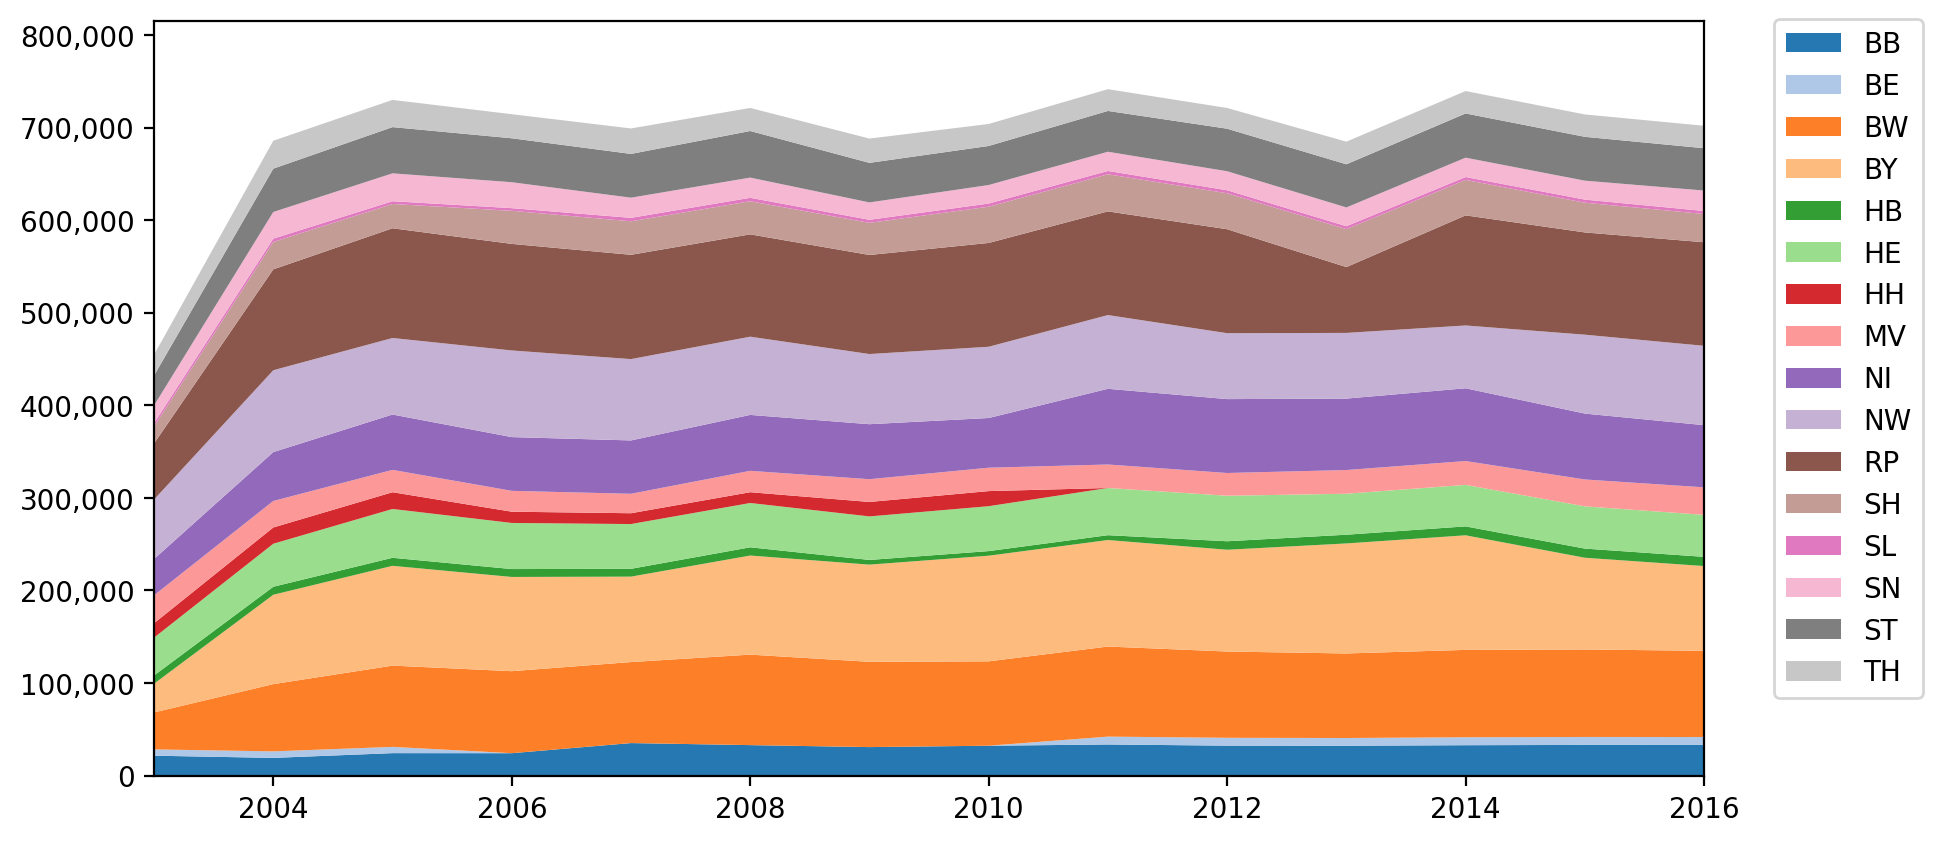

In [99]:
x = [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
names = []
rows = []

for name, land in grouped_by_land:
    by_year = land.groupby(['year'])['trucks_r1', 'trucks_r2'].sum()
    names.append(name)
    data = (by_year['trucks_r1'] + by_year['trucks_r2'])
    data = data.fillna(method='pad').values
    rows.append(data)

fig, ax = plt.subplots(figsize=(10, 5), dpi=200)
ax.stackplot(x, rows, labels=names, colors=colors)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1.02))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.margins(0, 0.1)
plt.show()

In [100]:
type(x)

list

In [101]:
rows

[array([21476., 19082., 24222., 24167., 35100., 32895., 30757., 32239.,
        33575., 32335., 32229., 32802., 33092., 33065.]),
 array([6786., 7046., 6759.,    0.,    0.,    0.,    0.,    0., 8505.,
        8453., 8342., 8574., 8603., 8562.]),
 array([39957., 72653., 87801., 88602., 87526., 97763., 92144., 91183.,
        97320., 93219., 91343., 94412., 94532., 93158.]),
 array([ 31055.,  96576., 107826., 101815.,  92310., 107079., 104998.,
        114128., 115076., 109964., 118881., 123804.,  99118.,  91573.]),
 array([8902., 8642., 8687., 8528., 8432., 8887., 5066., 4970., 5233.,
        9188., 9425., 9628., 9874., 9951.]),
 array([40861., 46474., 52744., 49821., 48362., 47863., 47029., 48511.,
        51003., 49169., 44291., 44837., 45644., 45364.]),
 array([15576., 17584., 18097., 12152., 11709., 11665., 15628., 16327.,
            0.,     0.,     0.,     0.,     0.,     0.]),
 array([30166., 28622., 24147., 22542., 21014., 23093., 24579., 25264.,
        25377., 24584., 25604., 

In [13]:
names

['BB',
 'BE',
 'BW',
 'BY',
 'HB',
 'HE',
 'HH',
 'MV',
 'NI',
 'NW',
 'RP',
 'SH',
 'SL',
 'SN',
 'ST',
 'TH']

In [4]:
data = pd.read_csv('AirPassengers.csv') 
print(data.head())
print('\n Data Types:')
print(data.dtypes)

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In [13]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)
print(data.head())
print(data.dtypes)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121
#Passengers    int64
dtype: object


<ipython-input-13-86374088e02a>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m')


In [14]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [21]:
ts = data['#Passengers'] 
print(ts.head(10))
print(ts.dtypes)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64
int64


In [22]:
#1. Specific the index as a string constant: 
ts['1949-01-01'] 

112

In [23]:
#2. Import the datetime library and use 'datetime' function: 
from datetime import datetime 
ts[datetime(1949,1,1)]

112

In [24]:
#1. Specify the entire range:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [25]:
#2. Use ':' if one of the indices is at ends:
ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [26]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

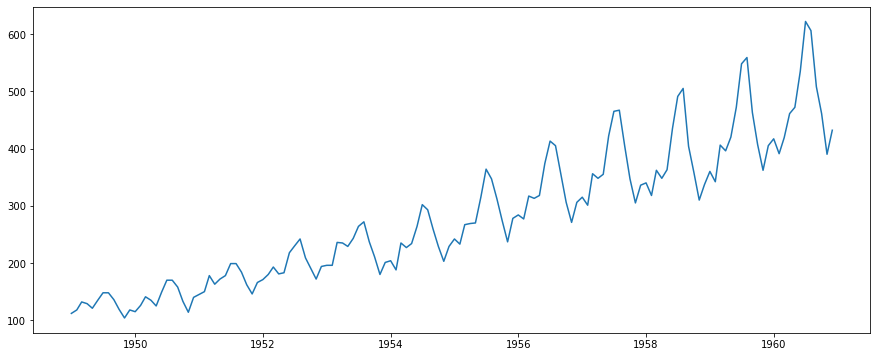

In [29]:
plt.plot(ts)

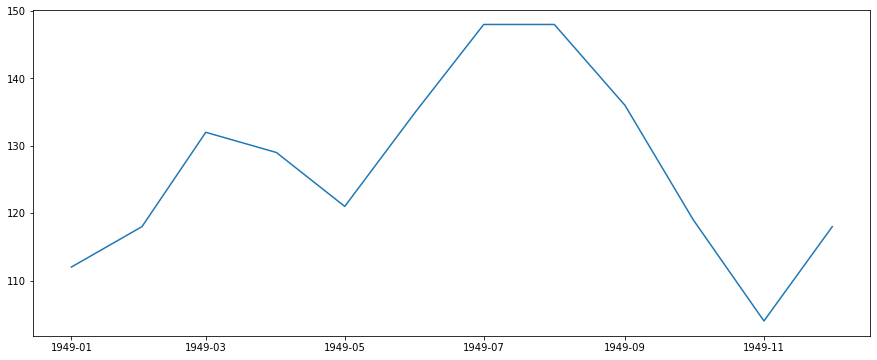

In [31]:
plt.plot(ts['1949'])

In [34]:
!conda install -c anaconda statsmodels

^C


In [39]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

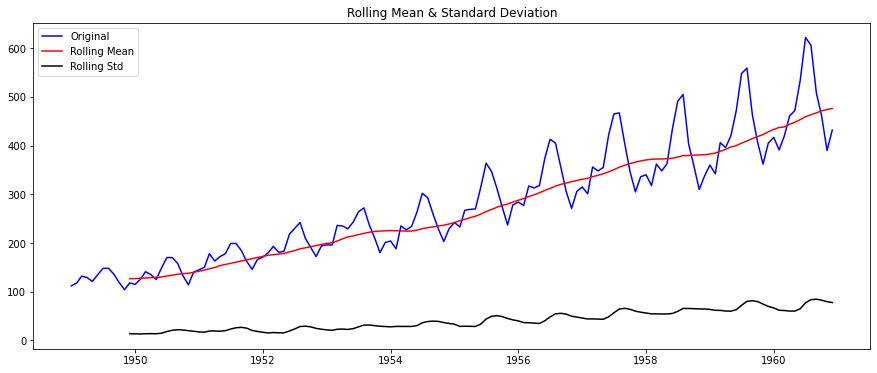

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [40]:
test_stationarity(ts)

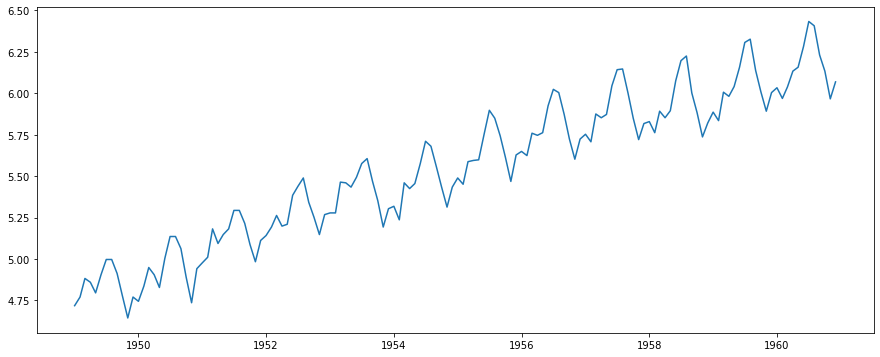

In [41]:
ts_log = np.log(ts)
plt.plot(ts_log)

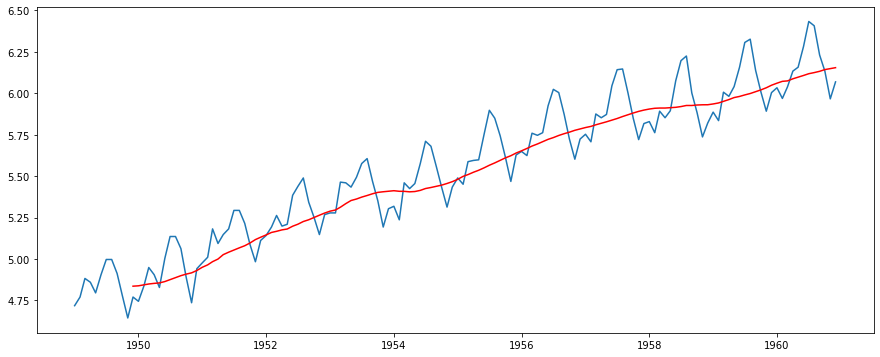

In [42]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [43]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

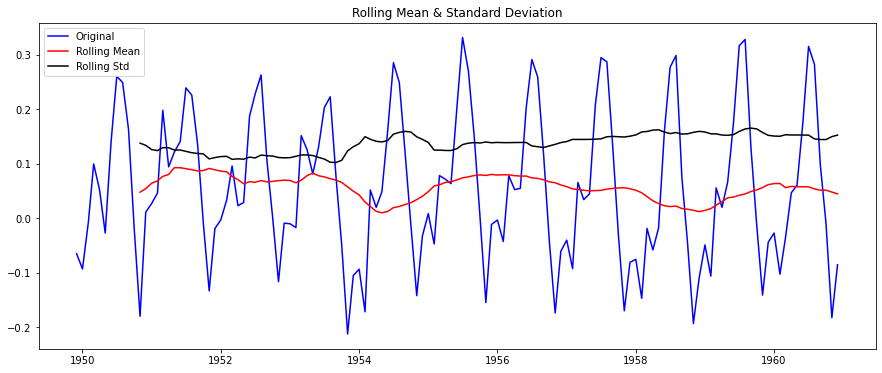

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [44]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [45]:
expwighted_avg = ts_log.rolling(12).ewma()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

AttributeError: 'Rolling' object has no attribute 'ewma'

In [46]:
import altair as alt


In [49]:
data.reset_index()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [51]:
import altair as alt
import data from 'vega-datasets'


SyntaxError: invalid syntax (<ipython-input-51-ce3abee66053>, line 2)

In [78]:
import altair as alt
import numpy as np
import pandas as pd

source = pd.DataFrame({
    'x': [10,20,np.nan,40,50],
    'y': ['risco 4','risco 3','risco 2','risco 1','teste'],
})

source['x1'] = source['y'].astype(str)
source

,x,y,x1
0,10.0,risco 4,risco 4
1,20.0,risco 3,risco 3
2,NaN,risco 2,risco 2
3,40.0,risco 1,risco 1
4,50.0,teste,teste


In [79]:
alt.Chart(source).mark_line(point=True).encode(
    x='x',
    y='y'
)

alt.Chart(...)

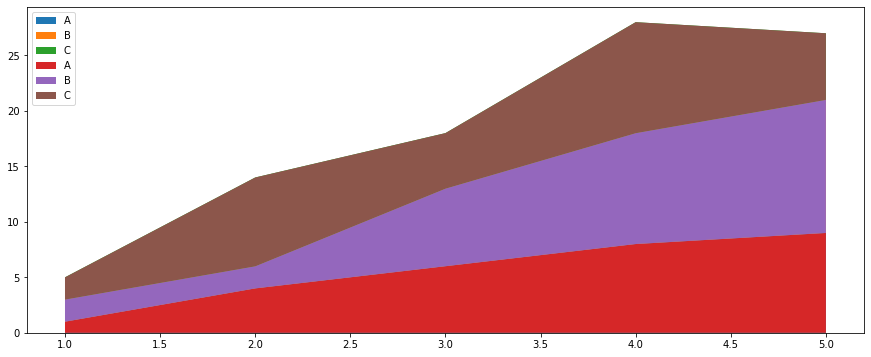

In [82]:
import matplotlib.pyplot as plt
 
# --- FORMAT 1
 
# Your x and y axis
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
# Basic stacked area chart.
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
#plt.show()
 
# --- FORMAT 2</pre>
x=range(1,6)
y1=[1,4,6,8,9]
y2=[2,2,7,10,12]
y3=[2,8,5,10,6]
 
# Basic stacked area chart.
plt.stackplot(x,y1, y2, y3, labels=['A','B','C'])
plt.legend(loc='upper left')
